In [96]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# modeling
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, auc, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("dataset.csv")
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [4]:
# basic metric of numerical column
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.380940,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,0.951715,1.288376,0.097148,1.560166,30.870502,0.358268,42.032412,15.106312,0.833496,0.468646,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,25.792453,20.705016,0.693287,0.745147,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,27.556986,26.510637,27.679751,26.623528,86.687955,38.273013,0.667355,0.579610,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.

In [5]:
# basic metric of categorical columns
df.describe(include = "object")

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
count,90318,91688,91601,91713,91713,90051,90051
unique,6,2,5,3,8,11,10
top,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
freq,70684,49469,54060,86183,50586,29999,38816


Most individuals hospitalized in this dataset are Causasians

They are mostly admitted to the emergency room and probably have undergone surgery

Most common bodysystem is cardiovascular

In [6]:
df.isna().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

There's a considerable amount of nan values, will impute it with median when I do modeling

In [7]:
df["hospital_death"].value_counts(normalize = True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

The distribution between 0 and 1 is imbalanced

In [8]:
# dropping unnamed 83 column, hospital_id, patient_id, encounter_id, icu_id, pre_icu_los_days
# dropping noninvasive columns because of repetition
df = df.drop(["encounter_id", "Unnamed: 83", "hospital_id", "patient_id", "icu_id", "pre_icu_los_days", "d1_diasbp_noninvasive_min", "d1_diasbp_noninvasive_max", "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min", "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min", "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min"], axis = 1)

In [9]:
# turning negative values to positive
df["apache_4a_hospital_death_prob"] = df["apache_4a_hospital_death_prob"].apply(abs)
df["apache_4a_icu_death_prob"] = df["apache_4a_icu_death_prob"].apply(abs)

In [10]:
# value counts per categorical column 
print("Ethnicity: \n", df["ethnicity"].value_counts())

Ethnicity: 
 Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64


In [11]:
print("Gender: \n", df["gender"].value_counts())

Gender: 
 M    49469
F    42219
Name: gender, dtype: int64


In [12]:
print("ICU Admit Source: \n", df["icu_admit_source"].value_counts())

ICU Admit Source: 
 Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64


In [13]:
print("ICU Stay Type: \n", df["icu_stay_type"].value_counts())

ICU Stay Type: 
 admit       86183
transfer     4970
readmit       560
Name: icu_stay_type, dtype: int64


In [14]:
print("ICU Type: \n", df["icu_type"].value_counts())

ICU Type: 
 Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64


In [15]:
print("Apache 3j Bodysystem: \n", df["apache_3j_bodysystem"].value_counts())

Apache 3j Bodysystem: 
 Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64


In [16]:
print("Apache 2 Bodysystem: \n", df["apache_2_bodysystem"].value_counts())

Apache 2 Bodysystem: 
 Cardiovascular         38816
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64


In [17]:
print("Hospital Deaths: \n", df["hospital_death"].value_counts())

Hospital Deaths: 
 0    83798
1     7915
Name: hospital_death, dtype: int64


There are 7915 individuals who died in this dataset and 83,798 who lived

## EDA

In [18]:
# correlation matrix

correlation = df.corr().abs()
correlation[correlation == 1] = 0
correlation_matrix = correlation.max().sort_values(ascending = True)
top15_corr = correlation_matrix[correlation_matrix > 0.83]
top15_corr
#top15_corr.keys()

h1_mbp_max                       0.845402
h1_diasbp_max                    0.845402
d1_mbp_min                       0.853284
d1_diasbp_min                    0.853284
h1_heartrate_min                 0.853792
h1_heartrate_max                 0.853792
h1_diasbp_min                    0.871372
h1_mbp_min                       0.871372
apache_3j_diagnosis              0.875655
bmi                              0.877339
weight                           0.877339
apache_4a_icu_death_prob         0.886925
apache_4a_hospital_death_prob    0.886925
apache_post_operative            0.908247
elective_surgery                 0.908247
dtype: float64

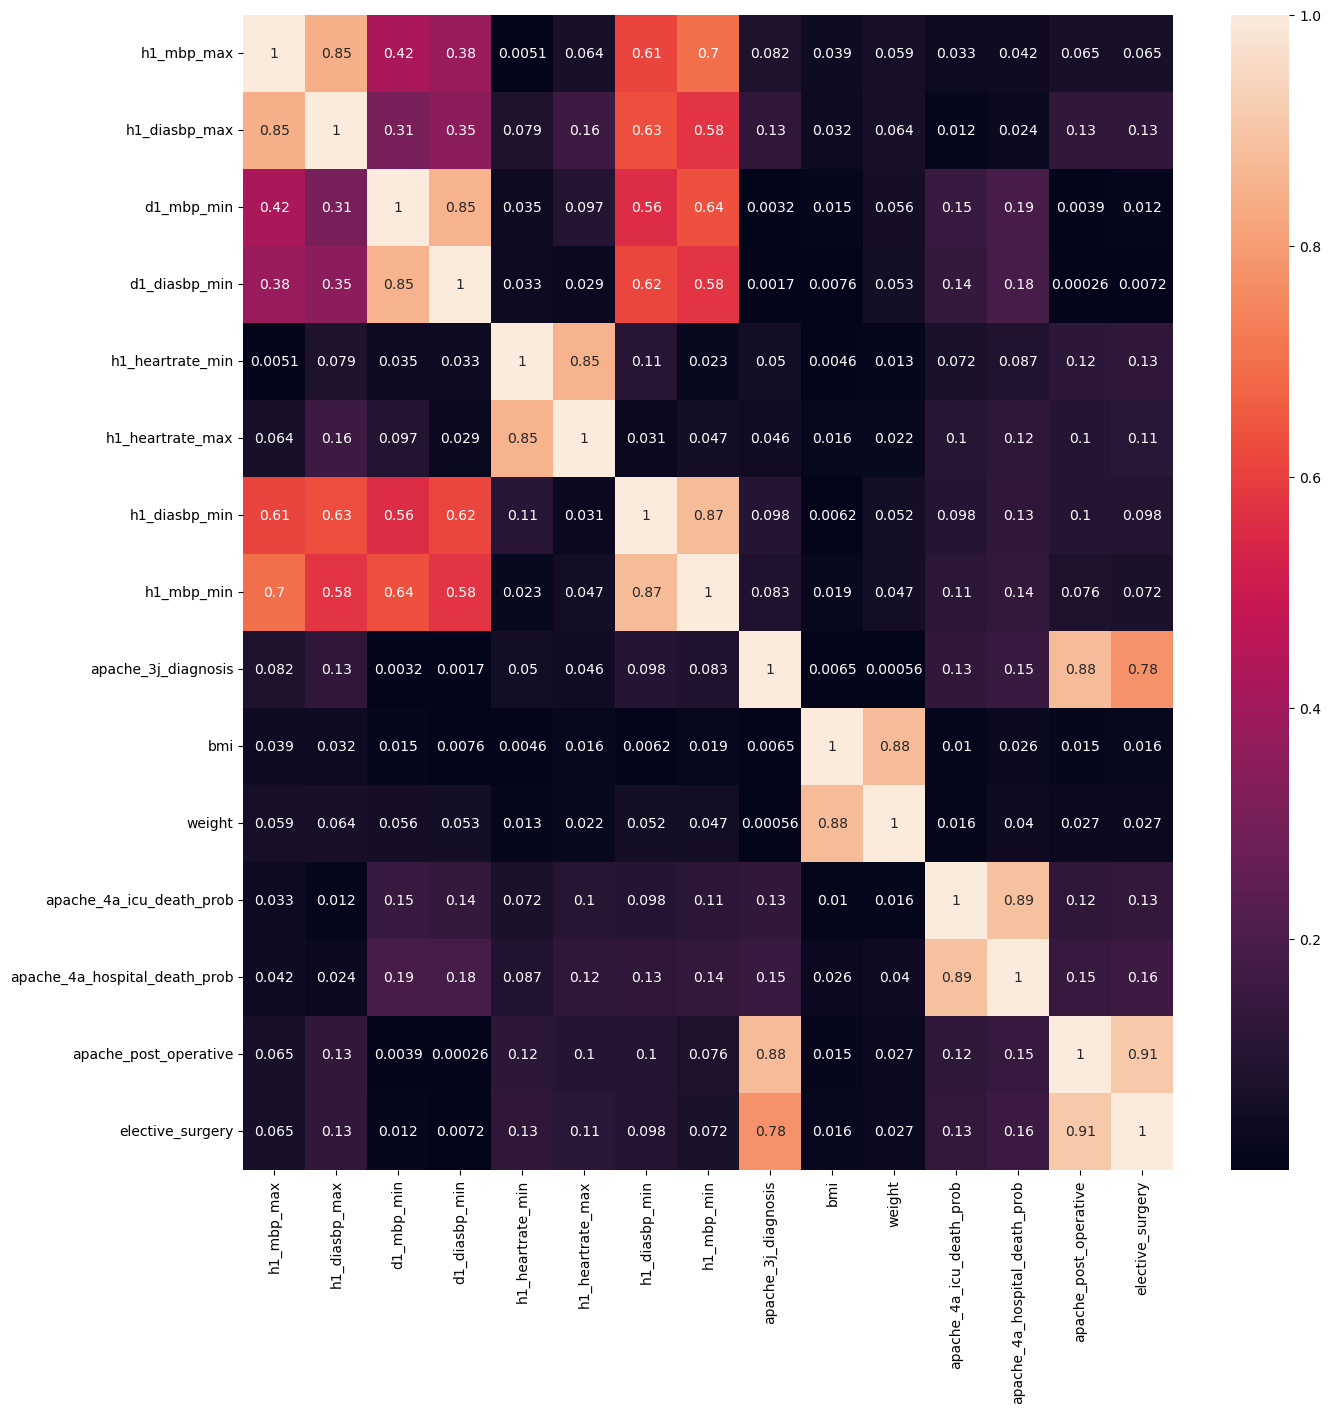

In [19]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df[top15_corr.index].corr().abs(), annot = True)
plt.show();

In [20]:
df.columns

Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_

In [21]:
# separate dataframe for individuals who died

hospital_death_yes = df.loc[df["hospital_death"] == 1]
hospital_death_yes                         

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
8,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,admit,CCU-CTICU,NaN,116.0,103.01,0,0.0,4.0,6.0,0.0,5.0,82.0,0.0,66.0,14.0,36.9,1.0,65.0,59.0,82.0,82.0,93.0,71.0,24.0,19.0,97.0,97.0,104.0,98.0,36.9,36.9,65.0,59.0,82.0,82.0,93.0,71.0,24.0,19.0,97.0,97.0,104.0,98.0,365.0,288.0,5.2,5.2,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1
25,68.0,26.010703,0,Caucasian,F,165.1,Floor,admit,CCU-CTICU,70.9,113.0,501.06,0,0.0,4.0,6.0,0.0,3.0,136.0,1.0,47.0,42.0,32.1,1.0,48.0,36.0,134.0,70.0,78.0,47.0,42.0,16.0,100.0,51.0,112.0,74.0,39.0,36.2,44.0,36.0,100.0,84.0,78.0,47.0,29.0,16.0,100.0,78.0,98.0,74.0,154.0,63.0,4.0,3.3,0.60,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,1
46,64.0,16.980389,0,Caucasian,M,180.3,Operating Room / Recovery,admit,Neuro ICU,55.2,217.0,1502.02,1,0.0,1.0,3.0,0.0,1.0,112.0,0.0,58.0,12.0,39.0,1.0,58.0,26.0,122.0,0.0,86.0,46.0,23.0,0.0,100.0,41.0,170.0,41.0,39.2,37.2,54.0,44.0,84.0,84.0,82.0,80.0,16.0,16.0,100.0,100.0,160.0,130.0,113.0,96.0,4.3,4.3,0.57,0.34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Neurological,Neurologic,1
58,55.0,NaN,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,NaN,105.0,207.01,0,0.0,4.0,6.0,0.0,5.0,129.0,0.0,69.0,59.0,36.7,0.0,84.0,50.0,129.0,108.0,98.0,69.0,42.0,24.0,100.0,89.0,150.0,86.0,37.8,36.7,70.0,55.0,122.0,118.0,75.0,74.0,31.0,31.0,97.0,95.0,116.0,103.0,160.0,155.0,3.9,3.7,0.04,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,1
73,74.0,25.311715,0,Caucasian,M,167.6,Accident & Emergency,admit,MICU,71.1,306.0,802.04,0,0.0,4.0,6.0,0.0,5.0,140.0,0.0,49.0,22.0,36.5,0.0,75.0,36.0,138.0,100.0,90.0,49.0,22.0,20.0,100.0,90.0,114.0,66.0,37.7,36.5,59.0,42.0,132.0,108.0,79.0,49.0,22.0,22.0,100.0,99.0,113.0,76.0,178.0,155.0,3.8,2.7,0.66,0.34,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Hematological,Haematologic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91602,19.0,20.308204,0,Caucasian,M,177.8,Other Hospital,admit,Cardiac ICU,64.2,110.0,104.01,0,0.0,4.0,6.0,0.0,5.0,128.0,0.0,57.0,41.0,36.3,0.0,86.0,45.0,133.0,106.0,90.0,57.0,45.0,16.0,100.0,89.0,108.0,84.0,37.8,36.3,86.0,70.0,128.0,124.0,90.0,75.0,41.0,25.0,98.0,96.0,105.0,90.0,132.0,116.0,4.6,3.5,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1
91611,74.0,32.622159,0,Caucasian,M,170.2,Floor,admit,Cardiac ICU,94.5,114.0,102.01,0,1.0,2.0,4.0,0.0,1.0,96.0,0.0,50.0,6.0,36.3,1.0,62.0,29.0,97.0,72.0,184.0,46.0,30.0,0.0,100.0,84.0,134.0,82.0,36.8,36.3,56.0,49.0,96.0,79.0,75.0,62.0,30.0,22.0,100.0,98.0,126.0,99.0,430.0,125.0,5.1,4.9,0.60,0.36,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1
91620,NaN,21.067554,0,Caucasian,M,162.6,Floor,admit,Med-Surg ICU,55.7,113.0,501.05,0,0.0,4.0,6.0,0.0,5.0,125.0,0.0,58.0,43.0,35.6,1.0,89.0,49.0,125.0,62.0,100.0,58.0,43.0,19.0,100.0,87.0,128.0,81.0,36.8,35.6,89.0

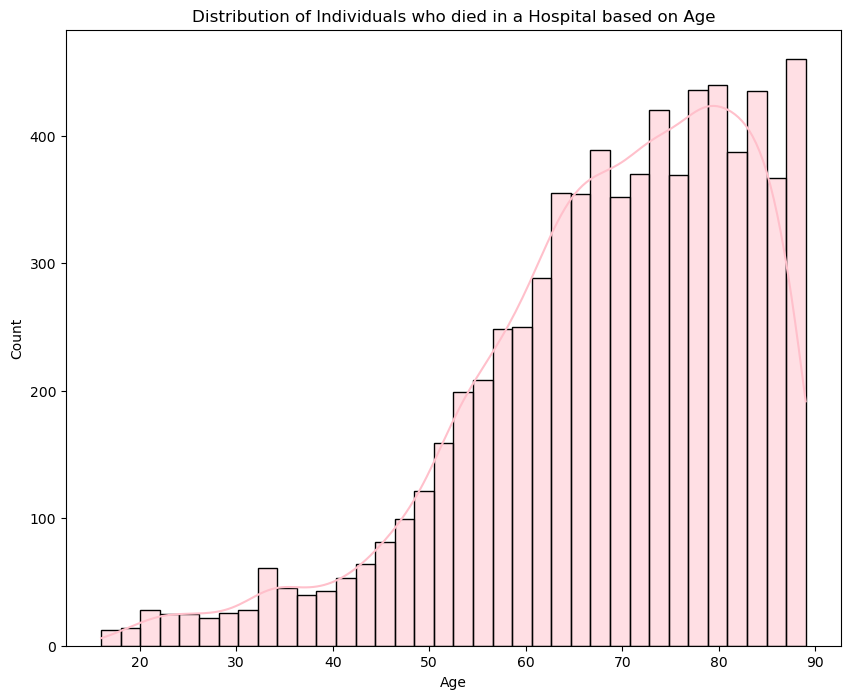

In [22]:
# distribution of individuals who died in a hospital based on age
fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(x = hospital_death_yes["age"], color = "pink", kde = True)
plt.title("Distribution of Individuals who died in a Hospital based on Age")
plt.xlabel("Age")
plt.show();

The older you are, the higher the chance of dying in a hospital

The death count skyrockets around Age 50 

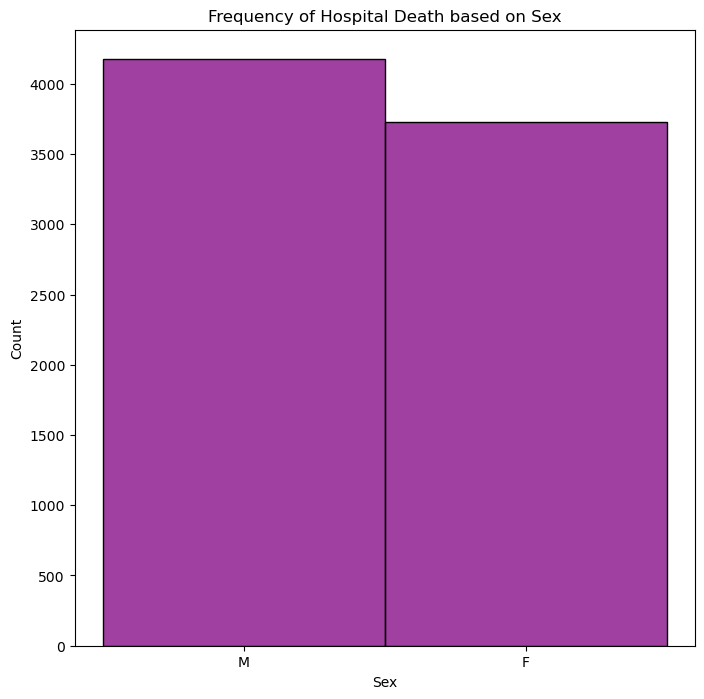

In [23]:
# distribution of individuals with heart disease based on sex
fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = hospital_death_yes, x = "gender", color = "Purple")
plt.title("Frequency of Hospital Death based on Sex")
plt.xlabel("Sex")
plt.show();

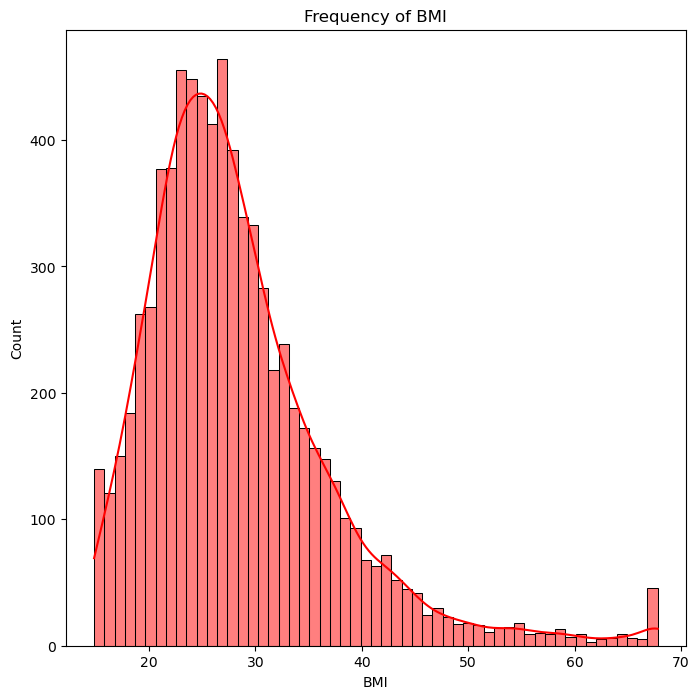

In [24]:
# distribution of individuals with heart disease based on sex
fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = hospital_death_yes, x = "bmi", color = "red", kde = True)
plt.title("Frequency of BMI")
plt.xlabel("BMI")
plt.show();

BMI of people who died in hospitals are surprisingly in the normal range

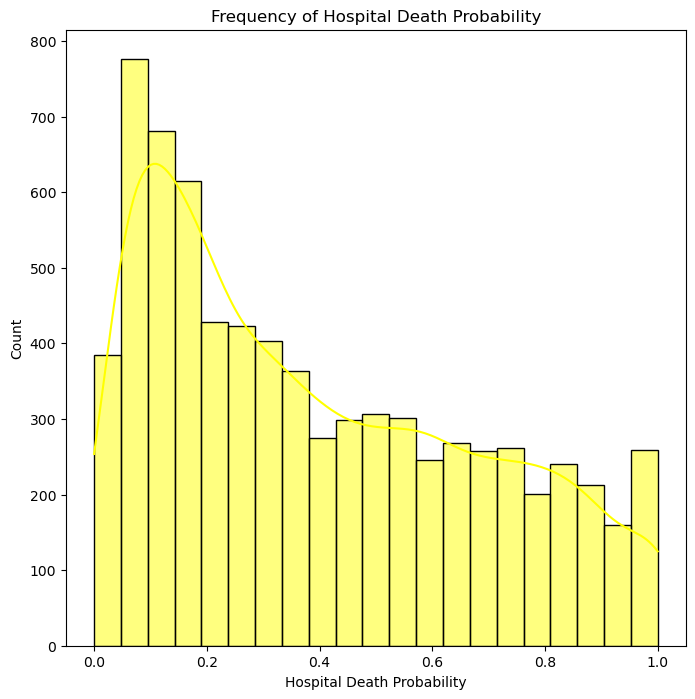

In [25]:
# distribution of hospital death probability
fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = hospital_death_yes, x = "apache_4a_hospital_death_prob", color = "yellow", kde = True)
plt.title("Frequency of Hospital Death Probability")
plt.xlabel("Hospital Death Probability")
plt.show();

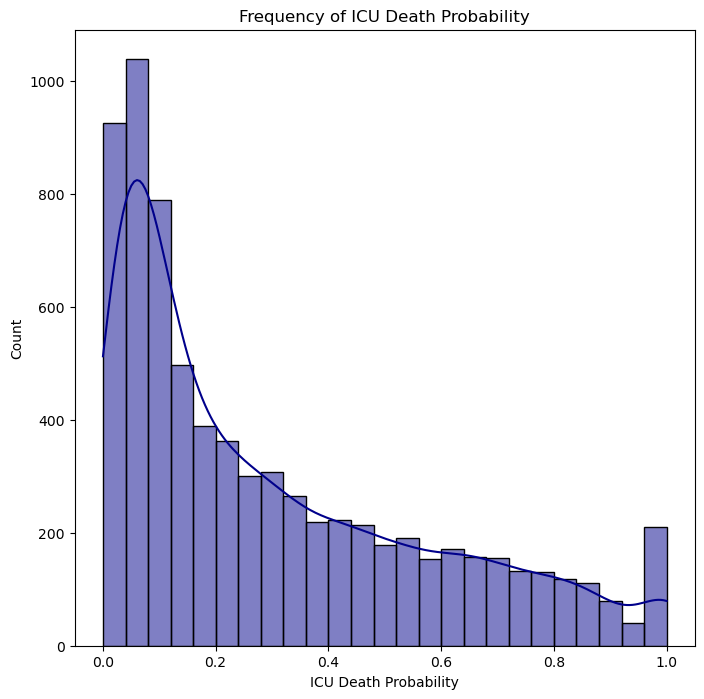

In [26]:
# distribution of icu death probability
fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = hospital_death_yes, x = "apache_4a_icu_death_prob", color = "DarkBlue", kde = True)
plt.title("Frequency of ICU Death Probability")
plt.xlabel("ICU Death Probability")
plt.show();

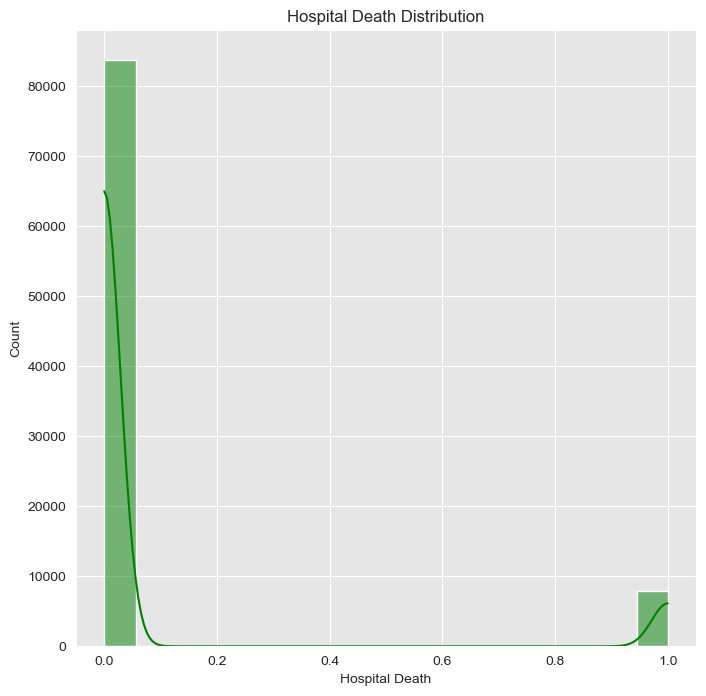

In [186]:
# distribution of hospital death probability
fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = df, x = "hospital_death", color = "green", kde = True)
plt.title("Hospital Death Distribution")
plt.xlabel("Hospital Death")
plt.show();

In [27]:
# most prevalent ethnicity between male and female
ethnicity = hospital_death_yes[["ethnicity"]].value_counts(normalize = True).reset_index()
ethnicity = ethnicity.rename(columns = {0: "Percentage"})
ethnicity

,ethnicity,Percentage
0,Caucasian,0.789757
1,African American,0.096031
2,Hispanic,0.048143
3,Other/Unknown,0.045198
4,Asian,0.011908
5,Native American,0.008963


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


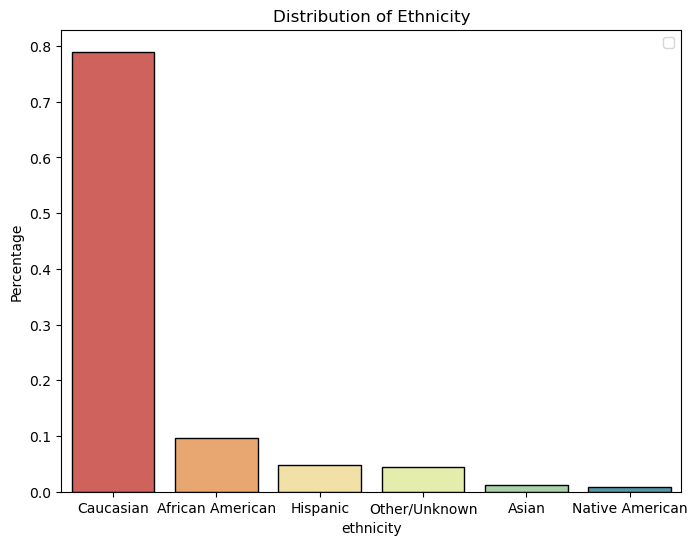

In [28]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = ethnicity, x = "ethnicity", y = "Percentage", edgecolor = "black", palette = "Spectral")
plt.title("Distribution of Ethnicity")
plt.legend()
plt.show();

Caucasians had the highest number of deaths compared to all the other ethnicity

In [29]:
# most prevalent icu admit source 
icu_admit_source = hospital_death_yes[["icu_admit_source"]].value_counts(normalize = True).reset_index()
icu_admit_source = icu_admit_source.rename(columns = {0: "Percentage"})
icu_admit_source

,icu_admit_source,Percentage
0,Accident & Emergency,0.590915
1,Floor,0.264963
2,Operating Room / Recovery,0.088321
3,Other Hospital,0.040111
4,Other ICU,0.015690


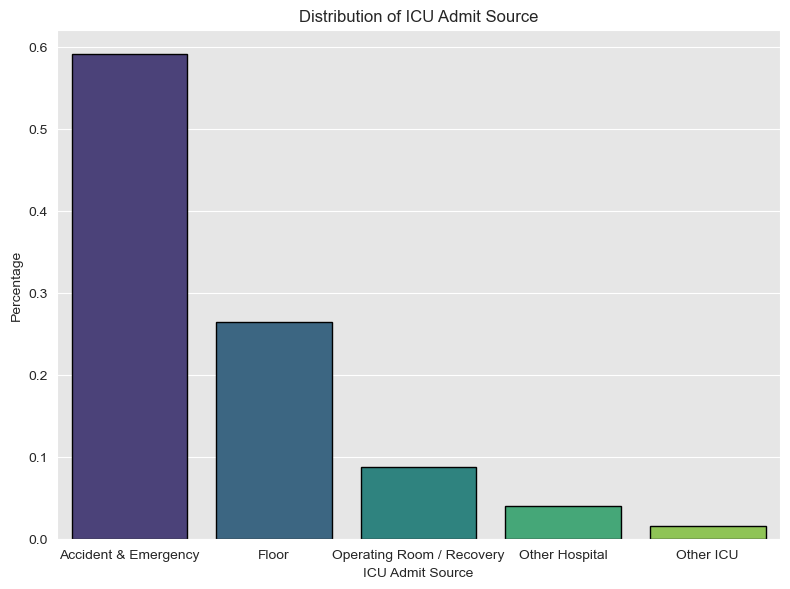

In [187]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = icu_admit_source, x = "icu_admit_source", y = "Percentage", edgecolor = "black", palette = "viridis")
plt.title("Distribution of ICU Admit Source")
plt.tight_layout()
plt.xlabel("ICU Admit Source")
plt.show();

The most common admit source among the hospital deaths are in the emergency room

In [31]:
# most prevalent icu stay type
icu_stay_type = hospital_death_yes[["icu_stay_type"]].value_counts(normalize = True).reset_index()
icu_stay_type = icu_stay_type.rename(columns = {0: "Percentage"})
icu_stay_type

,icu_stay_type,Percentage
0,admit,0.927353
1,transfer,0.066330
2,readmit,0.006317


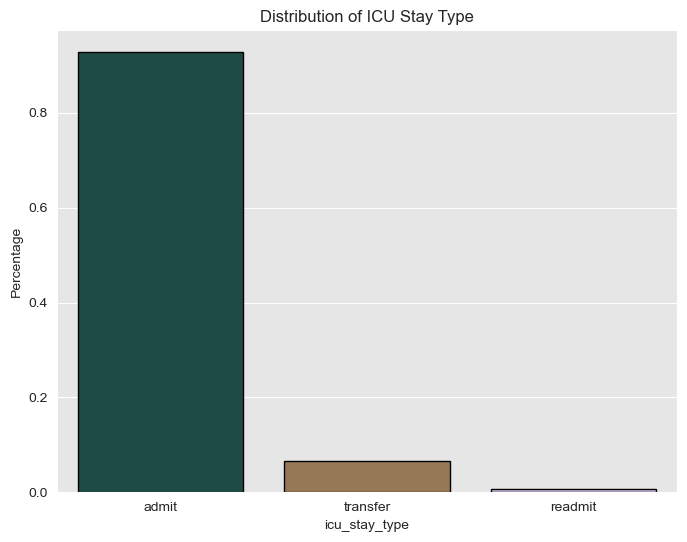

In [188]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = icu_stay_type, x = "icu_stay_type", y = "Percentage", edgecolor = "black", palette = "cubehelix")
plt.title("Distribution of ICU Stay Type")
plt.show();

The highest percentage of icu stay type is first time admittance

In [33]:
# most prevalent icu type
icu_type = hospital_death_yes[["icu_type"]].value_counts(normalize = True).reset_index()
icu_type = icu_type.rename(columns = {0: "Percentage"})
icu_type

,icu_type,Percentage
0,Med-Surg ICU,0.559191
1,MICU,0.117498
2,Neuro ICU,0.080606
3,CCU-CTICU,0.068478
4,Cardiac ICU,0.062413
5,SICU,0.049274
6,CSICU,0.032091
7,CTICU,0.030449


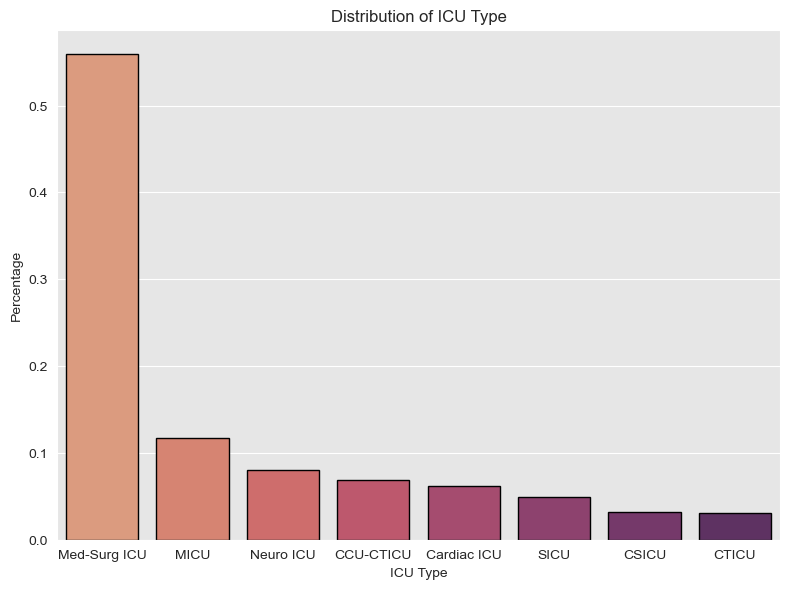

In [189]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = icu_type, x = "icu_type", y = "Percentage", edgecolor = "black", palette = "flare")
plt.title("Distribution of ICU Type")
plt.tight_layout()
plt.xlabel("ICU Type")
plt.show();

Highest percentage of admitted patients goes to medical-surgery icu 

In [35]:
# most prevalent apache II Bodysystem 
apache2_body = hospital_death_yes[["apache_2_bodysystem"]].value_counts(normalize = True).reset_index()
apache2_body = apache2_body.rename(columns = {0: "Percentage"})
apache2_body

,apache_2_bodysystem,Percentage
0,Cardiovascular,0.540815
1,Respiratory,0.167245
2,Neurologic,0.120838
3,Gastrointestinal,0.086129
4,Trauma,0.033295
5,Renal/Genitourinary,0.017483
6,Metabolic,0.014912
7,Undefined diagnoses,0.009513
8,Haematologic,0.007456
9,Undefined Diagnoses,0.002314


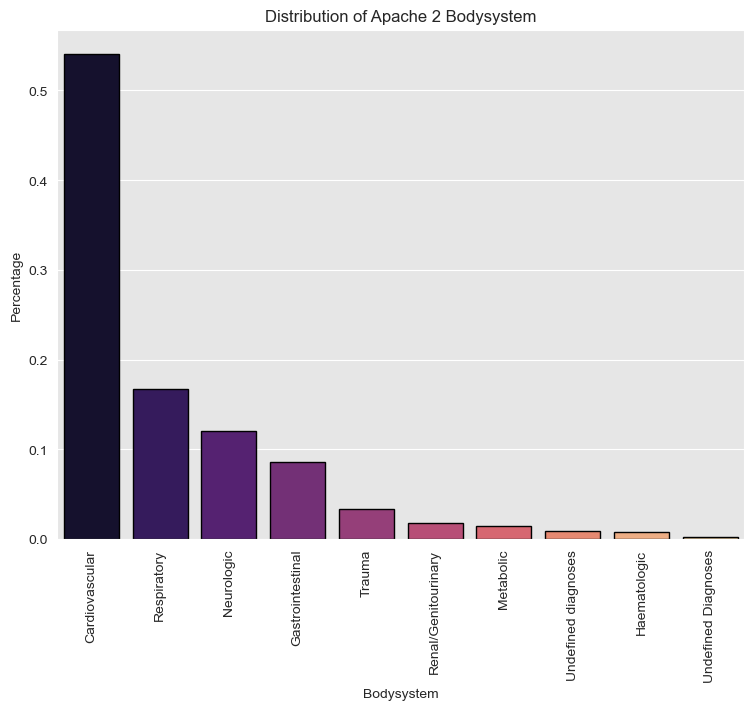

In [190]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = apache2_body, x = "apache_2_bodysystem", y = "Percentage", edgecolor = "black", palette = "magma")
plt.title("Distribution of Apache 2 Bodysystem")
plt.tight_layout()
plt.xlabel("Bodysystem")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show();

According to the CDC, Heart Disease is the number 1 cause of death worldwide. This graph shows that 54% of the
admitted patients who died, died due to cardiovascular diseases

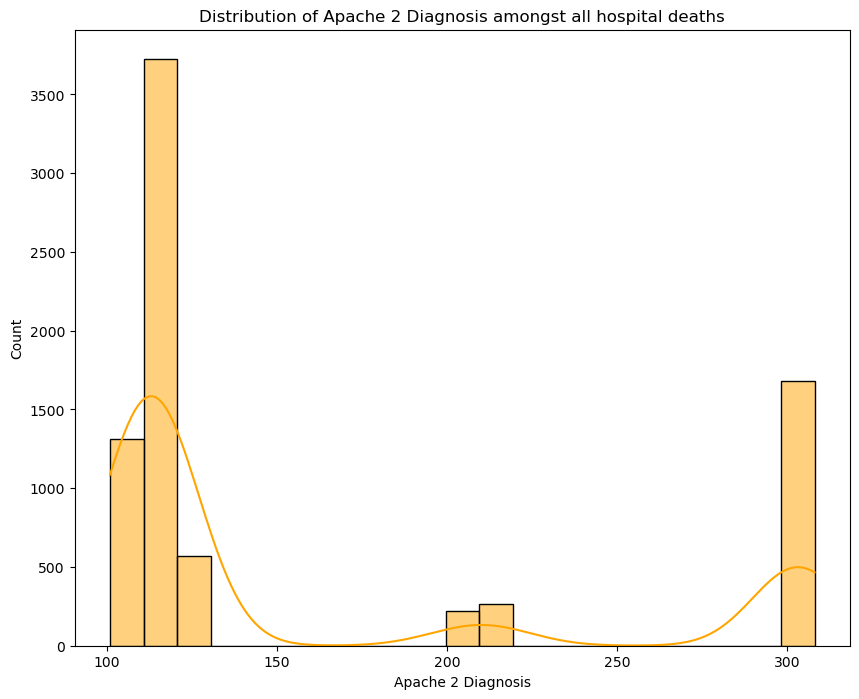

In [37]:
# distribution of apache 2 diagnosis which is the mortality rate given by doctors the moment the patient is admitted
fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(x = hospital_death_yes["apache_2_diagnosis"], color = "orange", kde = True)
plt.title("Distribution of Apache 2 Diagnosis amongst all hospital deaths")
plt.xlabel("Apache 2 Diagnosis")
plt.show();

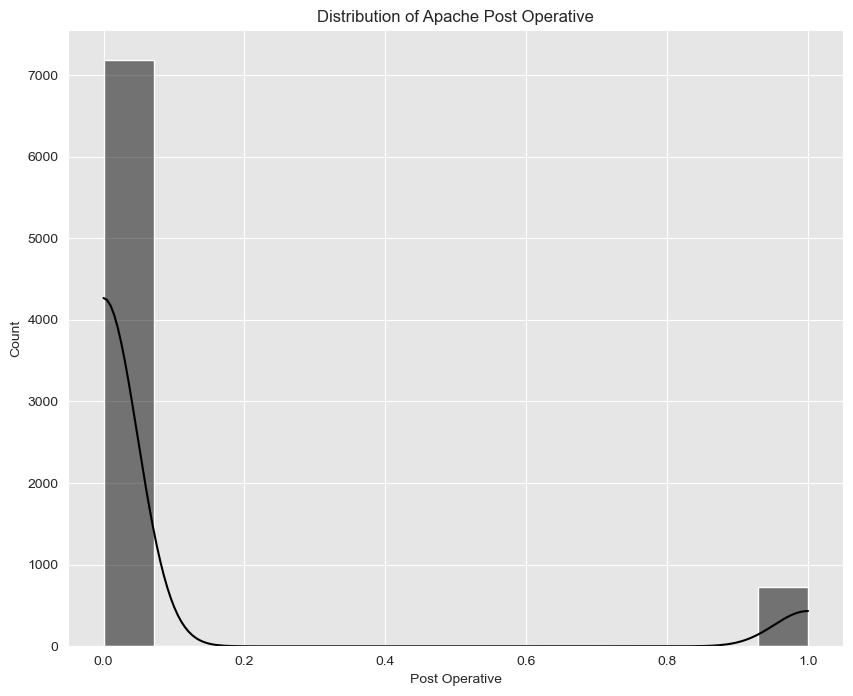

In [107]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(x = hospital_death_yes["apache_post_operative"], color = "black", kde = True)
plt.title("Distribution of Apache Post Operative")
plt.xlabel("Post Operative")
plt.show();

In [38]:
df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,68.0,63.0,119.0,108.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,61.0,48.0,114.0,100.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,96.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,37.0,36.7,88.0,58.0,96.0,78.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,116.0,92.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,38.0,34.8,62.0,44.0,100.0,96.0,92.0,71.0,12.0,11.0,100.0,99.0,136.0,106.0,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,89.0,60.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,37.2,36.7,99.0,68.0,89.0,76.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


## Modeling

In [39]:
# separating target variable and features 
# train test split 

X = df.drop(["hospital_death"], axis = 1)
y = df["hospital_death"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [40]:
# selecting numerical and categorical columns

num_cols = X_train.select_dtypes(['int', 'float']).columns
categorical_cols = X_train.select_dtypes('object').columns
with_zero_values = ["d1_heartrate_min", "d1_resprate_min", "d1_spo2_max", "d1_spo2_min", "h1_resprate_min", "h1_spo2_max", "h1_spo2_min"]

In [41]:
numeric_pipeline = Pipeline([
    ("numimputer", SimpleImputer(fill_value = 0, strategy = "median")), 
    ("scaler", StandardScaler())])

numeric_pipeline_2 = Pipeline([
    ("numimputer1", SimpleImputer(fill_value = np.nan, strategy = "median")),
    ("scaler", StandardScaler())])

categorical_pipeline = Pipeline([
    ('ohe', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

ct = ColumnTransformer(
    [("categorical", categorical_pipeline, categorical_cols), 
     ("numpipe1", numeric_pipeline_2, num_cols),
     ("numpipe", numeric_pipeline, with_zero_values)])

In [153]:
X_train.columns

Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_

In [151]:
model3[0].transformers_[0][1].named_steps['ohe'].get_feature_names_out()

array(['ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown',
       'ethnicity_nan', 'gender_M', 'gender_nan',
       'icu_admit_source_Floor',
       'icu_admit_source_Operating Room / Recovery',
       'icu_admit_source_Other Hospital', 'icu_admit_source_Other ICU',
       'icu_admit_source_nan', 'icu_stay_type_readmit',
       'icu_stay_type_transfer', 'icu_type_CSICU', 'icu_type_CTICU',
       'icu_type_Cardiac ICU', 'icu_type_MICU', 'icu_type_Med-Surg ICU',
       'icu_type_Neuro ICU', 'icu_type_SICU',
       'apache_3j_bodysystem_Gastrointestinal',
       'apache_3j_bodysystem_Genitourinary',
       'apache_3j_bodysystem_Gynecological',
       'apache_3j_bodysystem_Hematological',
       'apache_3j_bodysystem_Metabolic',
       'apache_3j_bodysystem_Musculoskeletal/Skin',
       'apache_3j_bodysystem_Neurological',
       'apache_3j_bodysystem_Respiratory', 'apache_3j_bodysystem_Sepsis',
       'apache_3j_bo

## Logistic Regression

In [42]:
model1 = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ('model', LogisticRegression())])
model1

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')),
                                                 ('numpipe1',
                                                  Pipeline(steps=[('numimpute...
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtyp

In [85]:
# fitting the training set on the pipeline
model1.fit(X_train, y_train)
# prediction 
y_preds = model1.predict(X_test)
#print(accuracy_score(y_test, y_preds))
print("Accuracy Score:", model1.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds))
print("Precision Score:", precision_score(y_test, y_preds))
print("F1 Score:", f1_score(y_test, y_preds))

Accuracy Score: 0.7927951502464129
Recall Score: 0.77482088024565
Precision Score: 0.25991416309012877
F1 Score: 0.3892531173672709


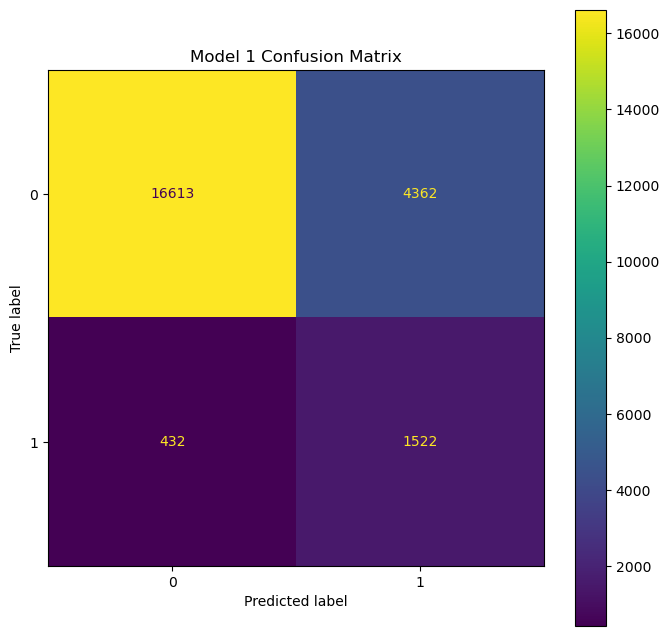

In [44]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 1 Confusion Matrix")
plot_confusion_matrix(model1, X_test, y_test, ax = ax)
plt.show()

The amount of false negatives is pretty high, we can try tuning the model to get a higher accuracy and recall rate. We do not want to misdiagnose a patient's mortality rate. 

In [45]:
y_score = model1.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print("AUC: {}".format(auc(fpr, tpr)))

AUC: 0.8680517211721805


## Model 1 Tuning (Logistic Regression)

In [46]:
# for tuning logistic regression

C_list = [1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]
cv_scores = []
cv_scores_std = []

for c in C_list:
    model1 = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ('model', LogisticRegression())])
    model1.fit(X_train,y_train)
    scores = model1.score(X_test,y_test)
    cv_scores.append(scores)

In [47]:
cv_scores

[0.7919228924069955,
 0.7929259889223255,
 0.7917920537310829,
 0.791094247459549,
 0.7921409568668498,
 0.791748440839112,
 0.7922281826507915,
 0.793056827598238]

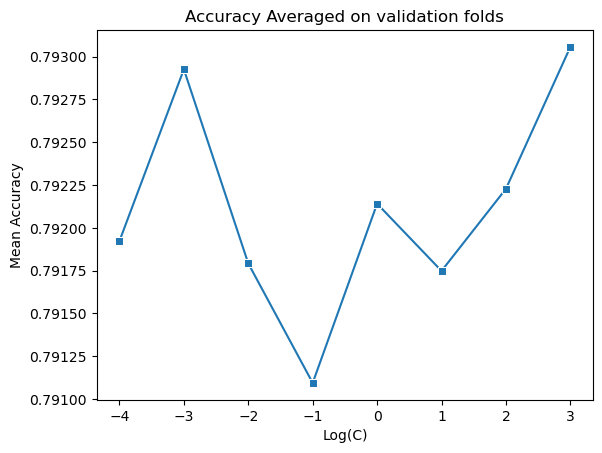

In [48]:
# plotting cv scores
fig, ax = plt.subplots()
sns.lineplot(x = np.log10(C_list), y = cv_scores, marker = "s", ax = ax)
ax.set_xlabel("Log(C)")
ax.set_ylabel("Mean Accuracy")
ax.set_title("Accuracy Averaged on validation folds")
plt.show()

AUC: 0.8680517211721805


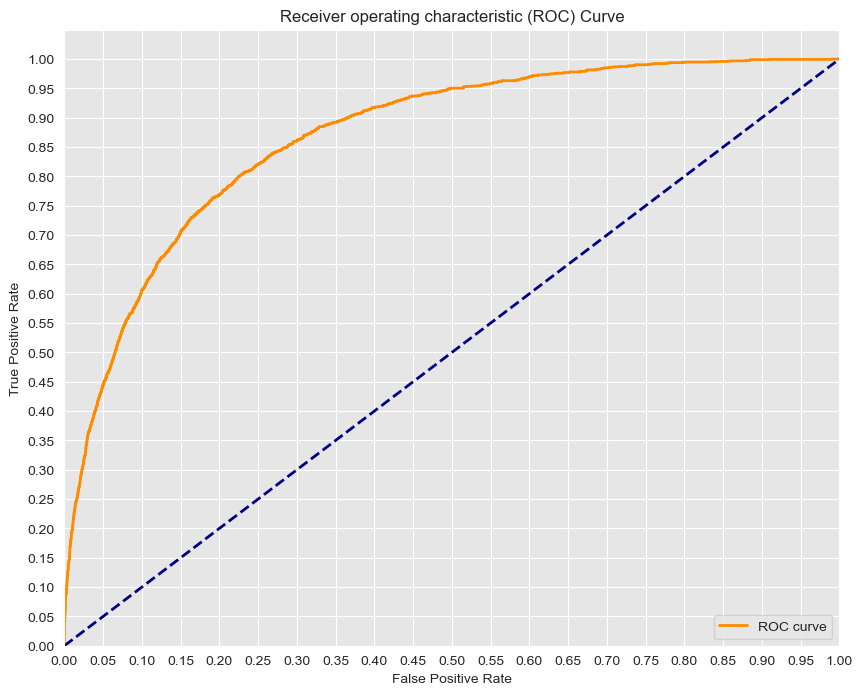

In [49]:
# calculating and plotting ROC AUC 

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [86]:
model2 = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ('model', LogisticRegression(C = 1e3))])

# fitting the training set on the pipeline
model2.fit(X_train, y_train)
# prediction 
y_preds2 = model2.predict(X_test)

print("Model 2 Accuracy Score:", model2.score(X_test, y_test))
print("Model 2 Recall Score:", recall_score(y_test, y_preds2))
print("Precision Score:", precision_score(y_test, y_preds2))
print("F1 Score:", f1_score(y_test, y_preds2))

Model 2 Accuracy Score: 0.7905708927558986
Model 2 Recall Score: 0.77482088024565
Precision Score: 0.25765827093260724
F1 Score: 0.38671775223499366


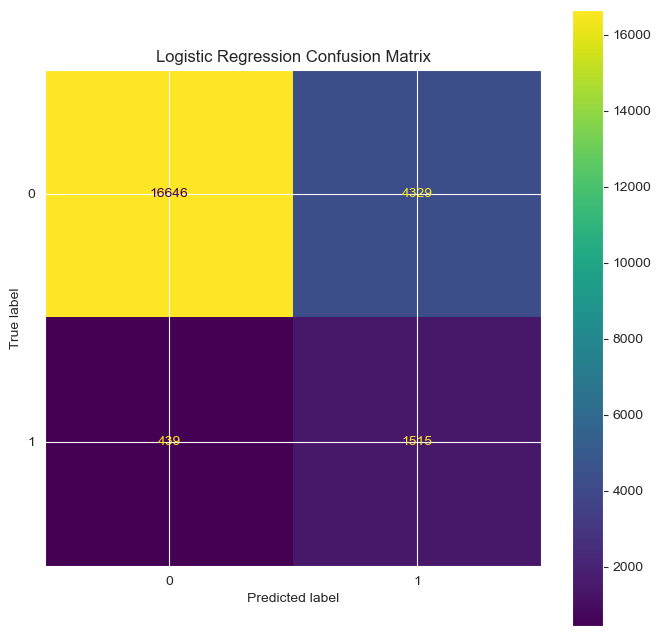

In [77]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Logistic Regression Confusion Matrix")
plot_confusion_matrix(model2, X_test, y_test, ax = ax)

In [52]:
y_score = model2.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print("AUC: {}".format(auc(fpr, tpr)))

AUC: 0.8681204289846445


AUC: 0.8681204289846445


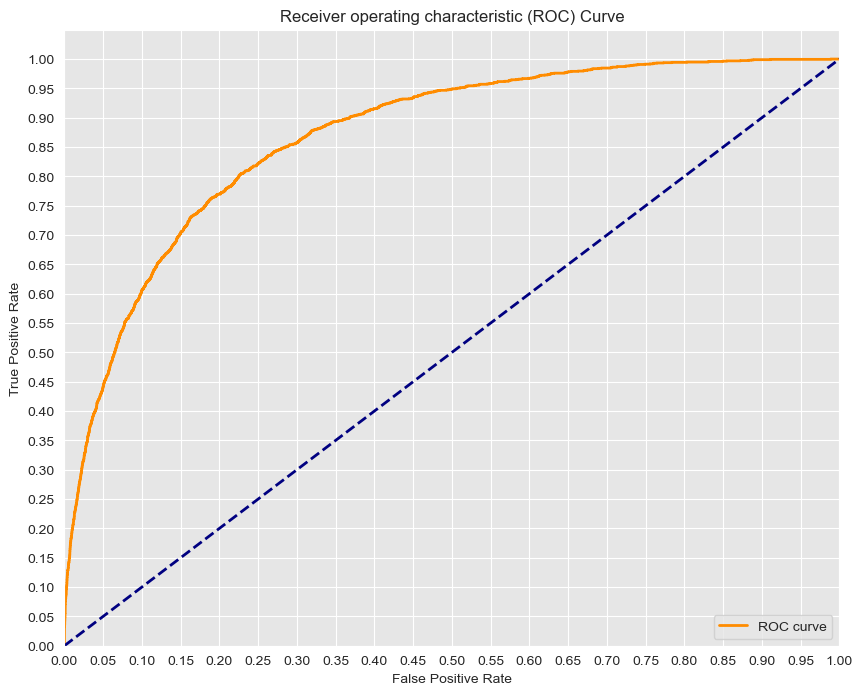

In [53]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

There was not a huge difference between the baseline logistic regression and the tuned one. Best AUC is 0.8697.

In [109]:
# Logistic Regression with hyperparameter tuning
# instantiate smote and random oversampler

smote = SMOTE(random_state=42)
over_samp = RandomOverSampler(random_state=42)

#3rd logistic regression model with more tuning
model3 = Pipeline([("preprocess", ct),
                   ("sampling", None),
                   ('model', LogisticRegression())])

#hyperparameter grid
grid = [{
    "model__C": [2, 4, 6, 8, 1e3],
    "model__fit_intercept": [True, False],
    "sampling": [smote, over_samp]
}]

# grid search cv
gs_logreg = GridSearchCV(estimator = model3, param_grid = grid, scoring = "recall", cv = 3)

# grid search logistic regression
gs_logreg.fit(X_train, y_train)

# best estimator
gs_logreg.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')),
                                                 ('numpipe1',
                                                  Pipeline(steps=[('numimpute...
      dtype='object')),
                                                 ('numpipe',
                                   

In [132]:
model3 = Pipeline([("preprocess", ct),
                   ("sampling", RandomOverSampler(random_state = 42)),
                   ("model", LogisticRegression(C = 6, fit_intercept = False))])

model3.fit(X_train, y_train)

y_preds_model3 = model3.predict(X_test)

print("Accuracy Score:", deci_tree_pipe_base.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_model3))
print("Precision Score:", precision_score(y_test, y_preds_model3))
print("F1 Score:", f1_score(y_test, y_preds_model3))

Accuracy Score: 0.873479000392516
Recall Score: 0.7727737973387923
Precision Score: 0.26224383466481416
F1 Score: 0.391597510373444


In [136]:
model3[-1].coef_

array([[-1.70823214e-01, -1.80387475e-01, -8.70555891e-02,
        -1.77244167e-01,  2.28773759e-03, -9.54374182e-02,
         1.38453048e-02, -1.14773019e-02,  3.28206025e-01,
        -5.25440355e-01,  4.77658024e-01,  3.68445810e-01,
        -3.73524266e-01, -1.29780264e+00, -2.62928254e-01,
        -5.25958450e-01, -1.48513408e-01, -1.05273272e-01,
        -1.53034697e-01, -2.69566890e-01, -3.16888380e-02,
         7.19591456e-02, -1.60374554e-01, -5.26267979e-01,
        -8.69454765e-01, -5.23043305e-01, -1.21297711e+00,
         2.06885166e-02, -2.32621301e-01, -9.78435833e-02,
        -6.30810531e-01, -5.03071155e-01,  1.28470462e-01,
        -1.60374554e-01, -5.23043305e-01, -1.21297711e+00,
        -2.32621301e-01, -1.20155336e+00, -9.78435833e-02,
        -5.03071155e-01, -2.44688663e+00, -1.50048333e+00,
         1.28470462e-01,  4.48726274e-01,  3.62794146e-02,
        -2.38649788e-01,  6.86460307e-02, -1.25043679e-01,
         2.57560200e-02,  1.03934679e+00, -8.67738945e-0

Changing SMOTE to random oversampler only increased my accuracy significantly but recall is still around .77

## Decision Trees

In [87]:
# base decision tree
deci_tree_pipe_base = Pipeline([
                   ("preprocess", ct),
                   ("smote", SMOTE()),
                   ("tree", DecisionTreeClassifier(random_state = 42))])

deci_tree_pipe_base.fit(X_train, y_train)
y_preds_deci = deci_tree_pipe_base.predict(X_test)

print("Accuracy Score:", deci_tree_pipe_base.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_deci))
print("Precision Score:", precision_score(y_test, y_preds_deci))
print("F1 Score:", f1_score(y_test, y_preds_deci))

Accuracy Score: 0.873479000392516
Recall Score: 0.3735926305015353
Precision Score: 0.30328209389281263
F1 Score: 0.33478559963311166


In [55]:
#deci_tree_pipe = Pipeline([
                   #("preprocess", ct),
                   #("smote", SMOTE()),
                   #("tree", DecisionTreeClassifier(random_state = 42))])
#grid = [{
    #"tree__criterion": ["gini"], 
    #"tree__max_depth": [12, 15, 17], 
    #"tree__min_samples_split": [1, 2, 3],
    #"tree__min_samples_leaf": [1, 2, 3]
#}]

#gs_deci_tree = GridSearchCV(estimator = deci_tree_pipe, param_grid = grid, scoring = "recall", cv = 5)
#gs_deci_tree.fit(X_train, y_train)

# best params
#gs_deci_tree.best_params_

In [88]:
# tuned decision tree
deci_tree_pipe1 = Pipeline([
                   ("preprocess", ct),
                   ("smote", SMOTE()),
                   ("tree", DecisionTreeClassifier(
                       criterion = "gini",
                       max_depth = 12,
                       min_samples_split = 3,
                       min_samples_leaf = 3,
                       random_state = 42))])

# fitting the tree pipeline on the training set
deci_tree_pipe1.fit(X_train, y_train)

# predictions
y_preds_deci_tuned = deci_tree_pipe1.predict(X_test)

print("Decision Tree Accuracy Score:", deci_tree_pipe1.score(X_test, y_test))
print("Decision Tree Recall Score:", recall_score(y_test, y_preds_deci_tuned))
print("Precision Score:", precision_score(y_test, y_preds_deci_tuned))
print("F1 Score:", f1_score(y_test, y_preds_deci_tuned))

Decision Tree Accuracy Score: 0.8197915303763793
Decision Tree Recall Score: 0.5470829068577278
Precision Score: 0.24768303985171455
F1 Score: 0.34098883572567784


This recall score in this model is really bad

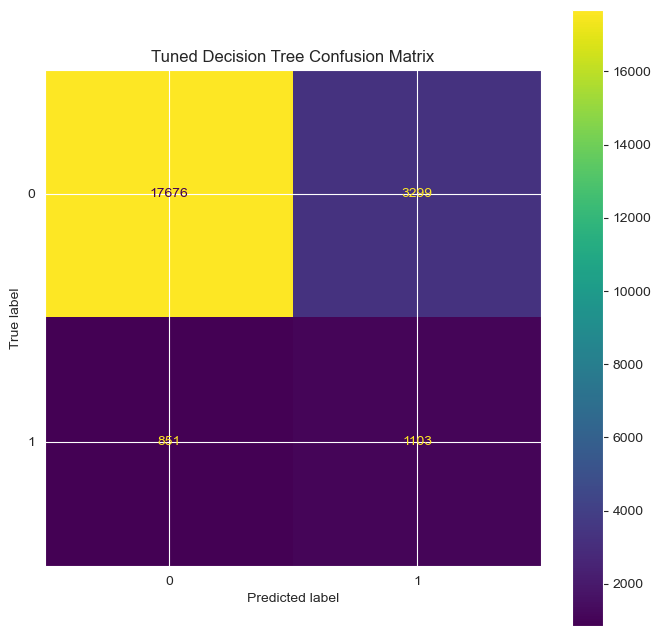

In [57]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Tuned Decision Tree Confusion Matrix")
plot_confusion_matrix(deci_tree_pipe1, X_test, y_test, ax = ax)
plt.show()

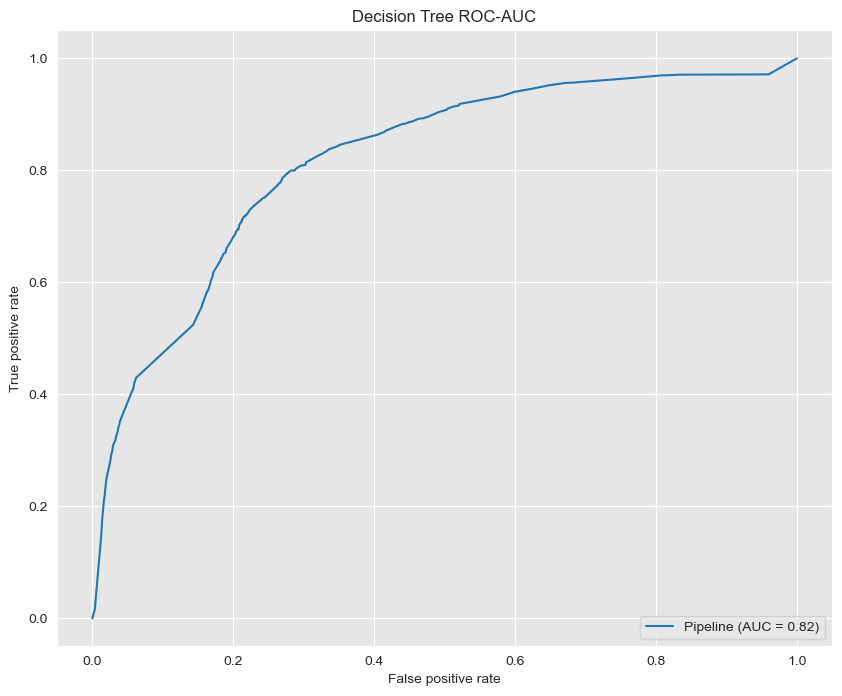

In [76]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(deci_tree_pipe1, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Decision Tree ROC-AUC')
plt.show();

AUC in this model is slightly lower compared to the first model with an AUC of 0.86

## K Nearest Neighbors

In [89]:
# base KNN 
knn_pipe_base = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ("knn", KNeighborsClassifier())])

knn_pipe_base.fit(X_train, y_train)

y_preds_knn = knn_pipe_base.predict(X_test)

print("Accuracy Score:", knn_pipe_base.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_knn))
print("Precision Score:", precision_score(y_test, y_preds_knn))
print("F1 Score:", f1_score(y_test, y_preds_knn))

Accuracy Score: 0.7488769680317502
Recall Score: 0.7190378710337769
Precision Score: 0.21242818264287874
F1 Score: 0.32796451914098973


In [60]:
# knn_pipe = Pipeline([("preprocess", ct),
#                    ("smote", SMOTE()),
#                    ("knn", KNeighborsClassifier()))])
# 
# grid = [{
#     "knn__n_neighbors": [3, 5, 7, 9],
#     "knn__p": [1, 2, 3]
# }]

# rs_knn = RandomizedSearchCV(estimator = knn_pipe, param_distributions = grid, scoring = "recall", cv = 3)

# rs_knn.fit(X_train, y_train)

# rs_knn.best_params_
# {'knn__p': 2, 'knn__n_neighbors': 9}

In [90]:
# tuned KNN
knn_pipe = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ("knn", KNeighborsClassifier(n_neighbors = 9, p = 2))])

knn_pipe.fit(X_train, y_train)

y_preds_knn_tuned = knn_pipe.predict(X_test)

print("Accuracy Score:", knn_pipe.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_knn_tuned))
print("Precision Score:", precision_score(y_test, y_preds_knn_tuned))
print("F1 Score:", f1_score(y_test, y_preds_knn_tuned))

Accuracy Score: 0.7226656199572594
Recall Score: 0.77482088024565
Precision Score: 0.20368626395802503
F1 Score: 0.3225737722382018


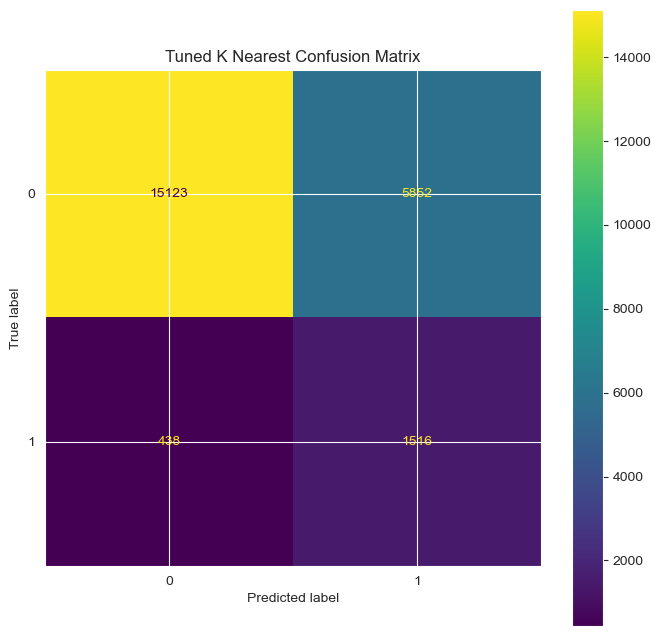

In [75]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Tuned K Nearest Confusion Matrix")
plot_confusion_matrix(knn_pipe, X_test, y_test, ax = ax)
plt.show()

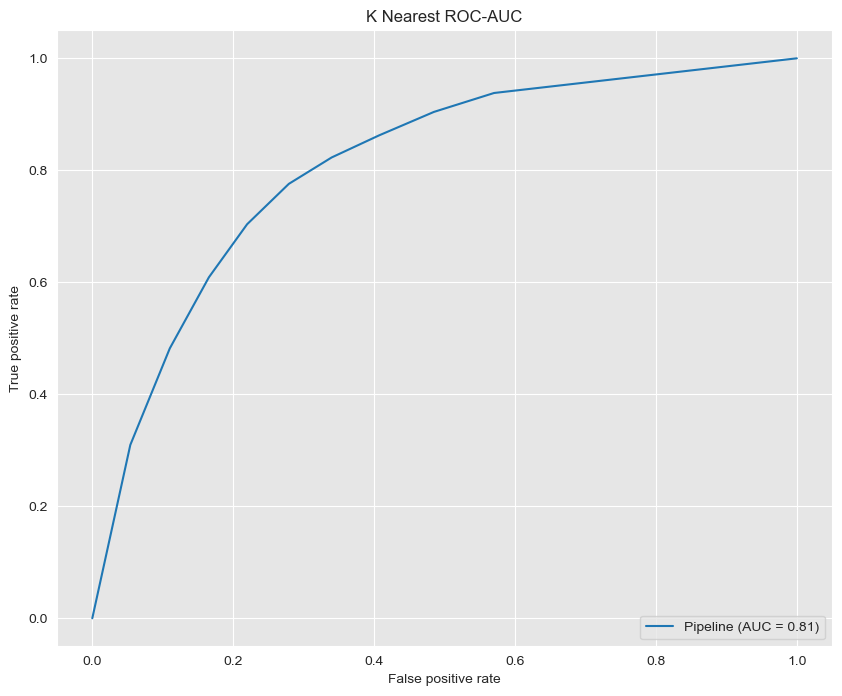

In [78]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(knn_pipe, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('K Nearest ROC-AUC')
plt.show();

## Random Forest 

In [91]:
# baseline random forest
rf_pipe_base = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ("rf_clf", RandomForestClassifier(random_state = 42))])

rf_pipe_base.fit(X_train, y_train)

y_preds_rf = rf_pipe_base.predict(X_test)

print("Accuracy Score:", rf_pipe_base.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_rf))
print("Precision Score:", precision_score(y_test, y_preds_rf))
print("F1 Score:", f1_score(y_test, y_preds_rf))

Accuracy Score: 0.9192725369619259
Recall Score: 0.3577277379733879
Precision Score: 0.5397683397683398
F1 Score: 0.43028624192059095


In [63]:
#rf_pipe = Pipeline([
                   #("preprocess", ct),
                   #("smote", SMOTE()),
                   #("forest", RandomForestClassifier(random_state = 42))])
#grid = [{
#     "forest__criterion": ["gini", "entropy"], 
#     "forest__max_depth": [5, 8, 12, 15], 
#     "forest__n_estimators": [50, 150, 200],
#     "forest__min_samples_leaf": [2, 5, 20, 50]
# }]
# 
# rs_rf_tree = RandomizedSearchCV(estimator = rf_pipe, param_distributions = grid, scoring = "recall", cv = 3)
# rs_rf_tree.fit(X_train, y_train)
# 
# best params
# rs_rf_tree.best_params_
# {'forest__n_estimators': 200,
#  'forest__min_samples_leaf': 5,
#  'forest__max_depth': 5,
#  'forest__criterion': 'entropy'}

In [92]:
# tuned random forest 
rf_pipe = Pipeline([
                   ("preprocess", ct),
                   ("smote", SMOTE()),
                   ("forest", RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_depth = 5, criterion = "entropy", random_state = 42))])

rf_pipe.fit(X_train, y_train)

y_preds_rf_tuned = rf_pipe.predict(X_test)

print("Accuracy Score:", rf_pipe.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_rf_tuned))
print("Precision Score:", precision_score(y_test, y_preds_rf_tuned))
print("F1 Score:", f1_score(y_test, y_preds_rf_tuned))

Accuracy Score: 0.8043089537267216
Recall Score: 0.7287615148413511
Precision Score: 0.26463482624047574
F1 Score: 0.38827539195637356


The recall went from 0.35 to 0.73 after hyperparameter tuning

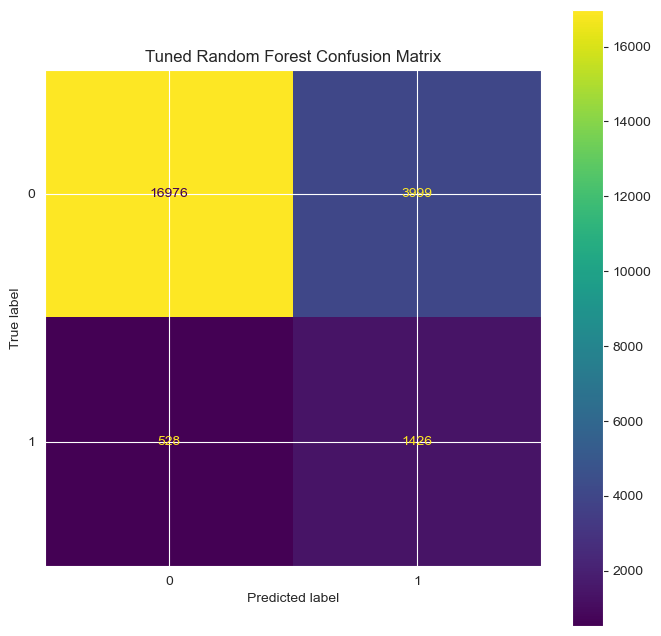

In [65]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Tuned Random Forest Confusion Matrix")
plot_confusion_matrix(rf_pipe, X_test, y_test, ax = ax)
plt.show();

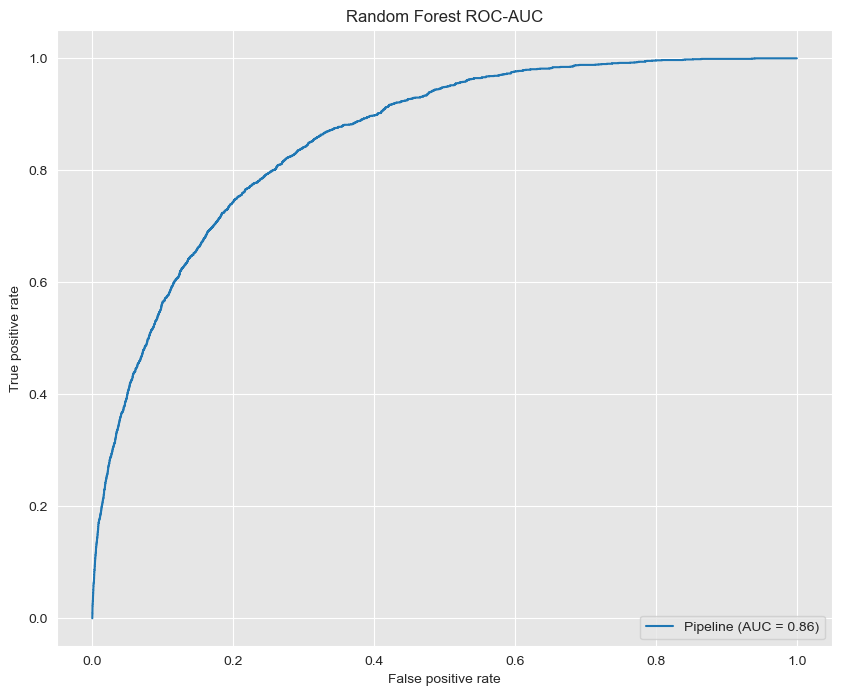

In [66]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(rf_pipe, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Random Forest ROC-AUC')
plt.show();

## XGBOOST 

In [93]:
# baseline XGBOOST
xgb_pipe_base = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ("xgb", XGBClassifier(random_state = 42))])

xgb_pipe_base.fit(X_train, y_train)

y_preds_xgb = xgb_pipe_base.predict(X_test)

print("Accuracy Score:", xgb_pipe_base.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_xgb))
print("Precision Score:", precision_score(y_test, y_preds_xgb))
print("F1 Score:", f1_score(y_test, y_preds_xgb))

[08:42:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.9277334380042741
Recall Score: 0.34953940634595704
Precision Score: 0.6389148737137512
F1 Score: 0.4518690043003639


In [68]:
xgb_pipe = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ("xgb", XGBClassifier(random_state = 42))])

grid = [{
    "xgb__gamma": [1, 1.5, 2, 2.5], 
    "xgb__learning_rate": [0.2, 0.4, 0.5], 
    "xgb__max_depth": [9, 10, 11, 12],
    "xgb__min_child_weight": [1, 2, 3], 
    "xgb__n_estimators": [50, 75, 100]
}]

rs_xgb = RandomizedSearchCV(estimator = xgb_pipe, param_distributions = grid, scoring = "recall", cv = 3)

rs_xgb.fit(X_train, y_train)

rs_xgb.best_params_

[07:46:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:47:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:47:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:47:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'xgb__n_estimators': 100,
 'xgb__min_child_weight': 3,
 'xgb__max_depth': 9,
 'xgb__learning_rate': 0.4,
 'xgb__gamma': 2.5}

In [94]:
# tuned xgboost
xgb_pipe = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ("xgb", XGBClassifier(
                       n_estimators = 50,
                       min_child_weight = 3,
                       max_depth = 11,
                       learning_rate = 0.2, 
                       gamma = 2, 
                       random_state = 42))])

xgb_pipe.fit(X_train, y_train)

y_preds_xgb_tuned = xgb_pipe.predict(X_test)

print("Accuracy Score:", xgb_pipe.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds_xgb_tuned))
print("Precision Score:", precision_score(y_test, y_preds_xgb_tuned))
print("F1 Score:", f1_score(y_test, y_preds_xgb_tuned))

[08:43:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.9243316324305465
Recall Score: 0.33725690890481064
Precision Score: 0.5996360327570519
F1 Score: 0.43170651817884054


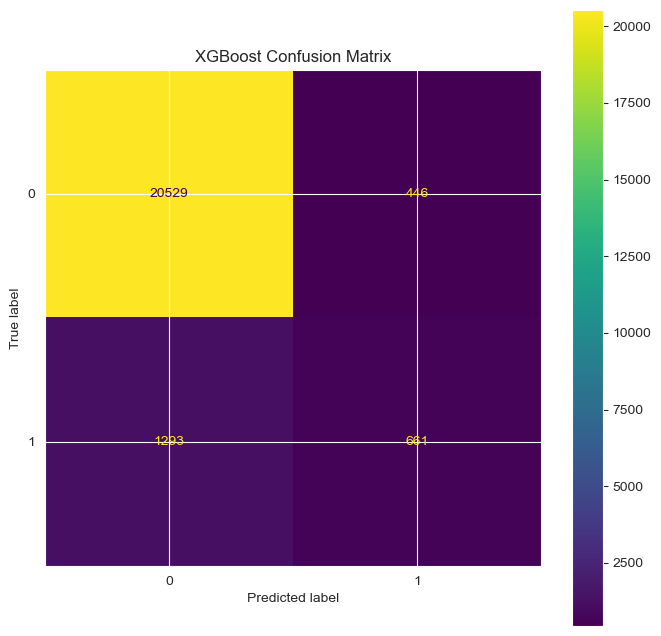

In [79]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("XGBoost Confusion Matrix")
plot_confusion_matrix(xgb_pipe, X_test, y_test, ax = ax)
plt.show();

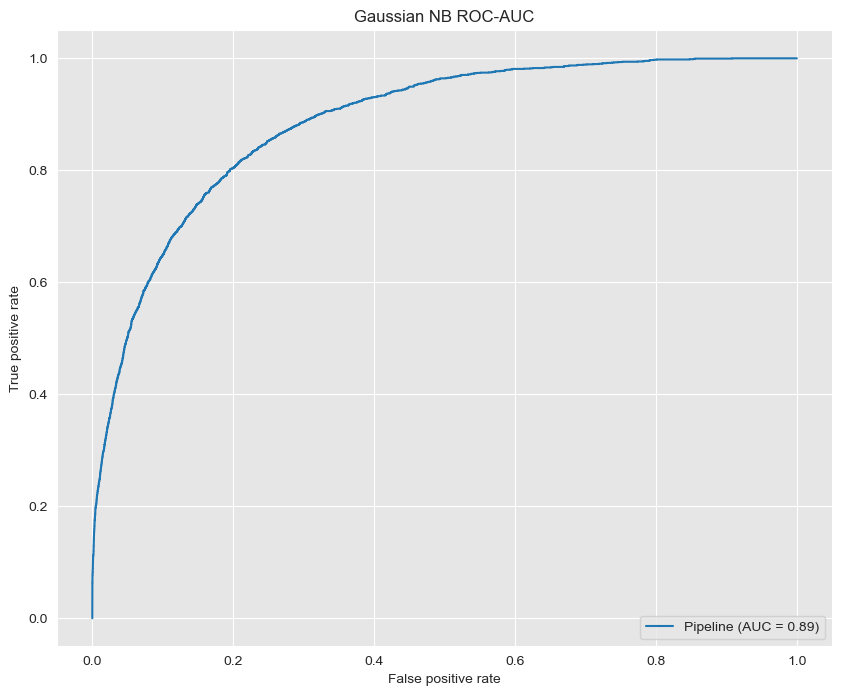

In [80]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(xgb_pipe, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Gaussian NB ROC-AUC')
plt.show();

## Gaussian Naive Bayes

In [191]:
# base gaussian nb
nb_pipe_base = Pipeline([("preprocess", ct),
                   ("smote", SMOTE()),
                   ("nb", GaussianNB())])

nb_pipe_base.fit(X_train, y_train)

y_preds = nb_pipe_base.predict(X_test)

print("Accuracy Score:", nb_pipe_base.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, y_preds))
print("Precision Score:", precision_score(y_test, y_preds))
print("F1 Score:", f1_score(y_test, y_preds))

Accuracy Score: 0.705133237384971
Recall Score: 0.7492323439099283
Precision Score: 0.18926955397543632
F1 Score: 0.3021983692847559


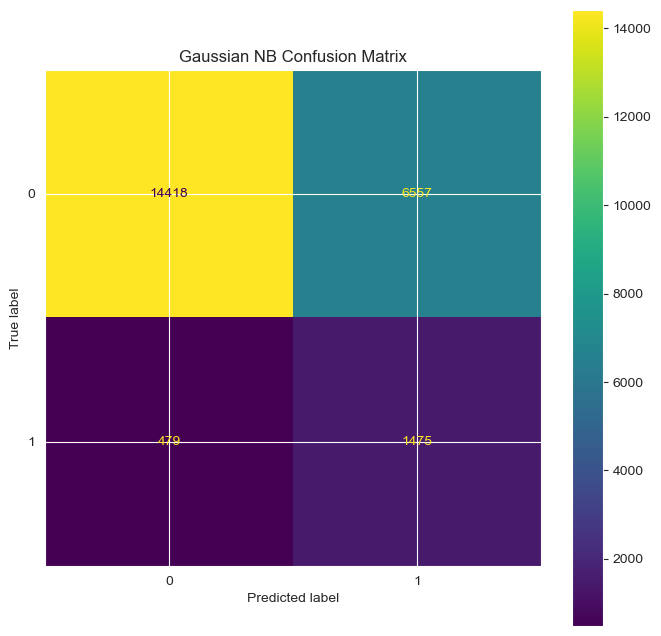

In [71]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Gaussian NB Confusion Matrix")
plot_confusion_matrix(nb_pipe_base, X_test, y_test, ax = ax)
plt.show();

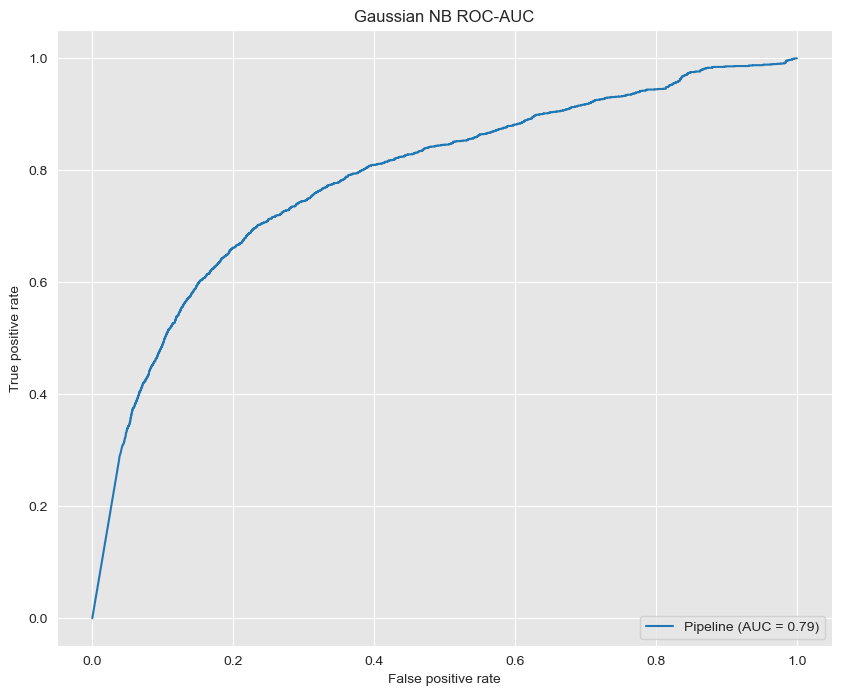

In [74]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(nb_pipe_base, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Gaussian NB ROC-AUC')
plt.show();

In [167]:
lr_feature_weight = model3[-1].coef_
lr_feature_weight

array([[-1.70823214e-01, -1.80387475e-01, -8.70555891e-02,
        -1.77244167e-01,  2.28773759e-03, -9.54374182e-02,
         1.38453048e-02, -1.14773019e-02,  3.28206025e-01,
        -5.25440355e-01,  4.77658024e-01,  3.68445810e-01,
        -3.73524266e-01, -1.29780264e+00, -2.62928254e-01,
        -5.25958450e-01, -1.48513408e-01, -1.05273272e-01,
        -1.53034697e-01, -2.69566890e-01, -3.16888380e-02,
         7.19591456e-02, -1.60374554e-01, -5.26267979e-01,
        -8.69454765e-01, -5.23043305e-01, -1.21297711e+00,
         2.06885166e-02, -2.32621301e-01, -9.78435833e-02,
        -6.30810531e-01, -5.03071155e-01,  1.28470462e-01,
        -1.60374554e-01, -5.23043305e-01, -1.21297711e+00,
        -2.32621301e-01, -1.20155336e+00, -9.78435833e-02,
        -5.03071155e-01, -2.44688663e+00, -1.50048333e+00,
         1.28470462e-01,  4.48726274e-01,  3.62794146e-02,
        -2.38649788e-01,  6.86460307e-02, -1.25043679e-01,
         2.57560200e-02,  1.03934679e+00, -8.67738945e-0

In [157]:
# model 3 feature importances

ohe = OneHotEncoder(handle_unknown = "ignore")
ohe_train = ohe.fit_transform(X_train[categorical_cols]).toarray()
ohe_test = ohe.transform(X_test[categorical_cols]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

col = X_train.drop(X_train[categorical_cols], axis = 1)
features = col.columns

ohe_cols = ohe_train.columns
columns = np.append(features, ohe_cols)

In [163]:
features

Index(['age', 'bmi', 'elective_surgery', 'height', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_pr

In [174]:
lrweight = lr_feature_weight[0]
lrweight1 = lrweight[0:59]
len(lrweight1)

59

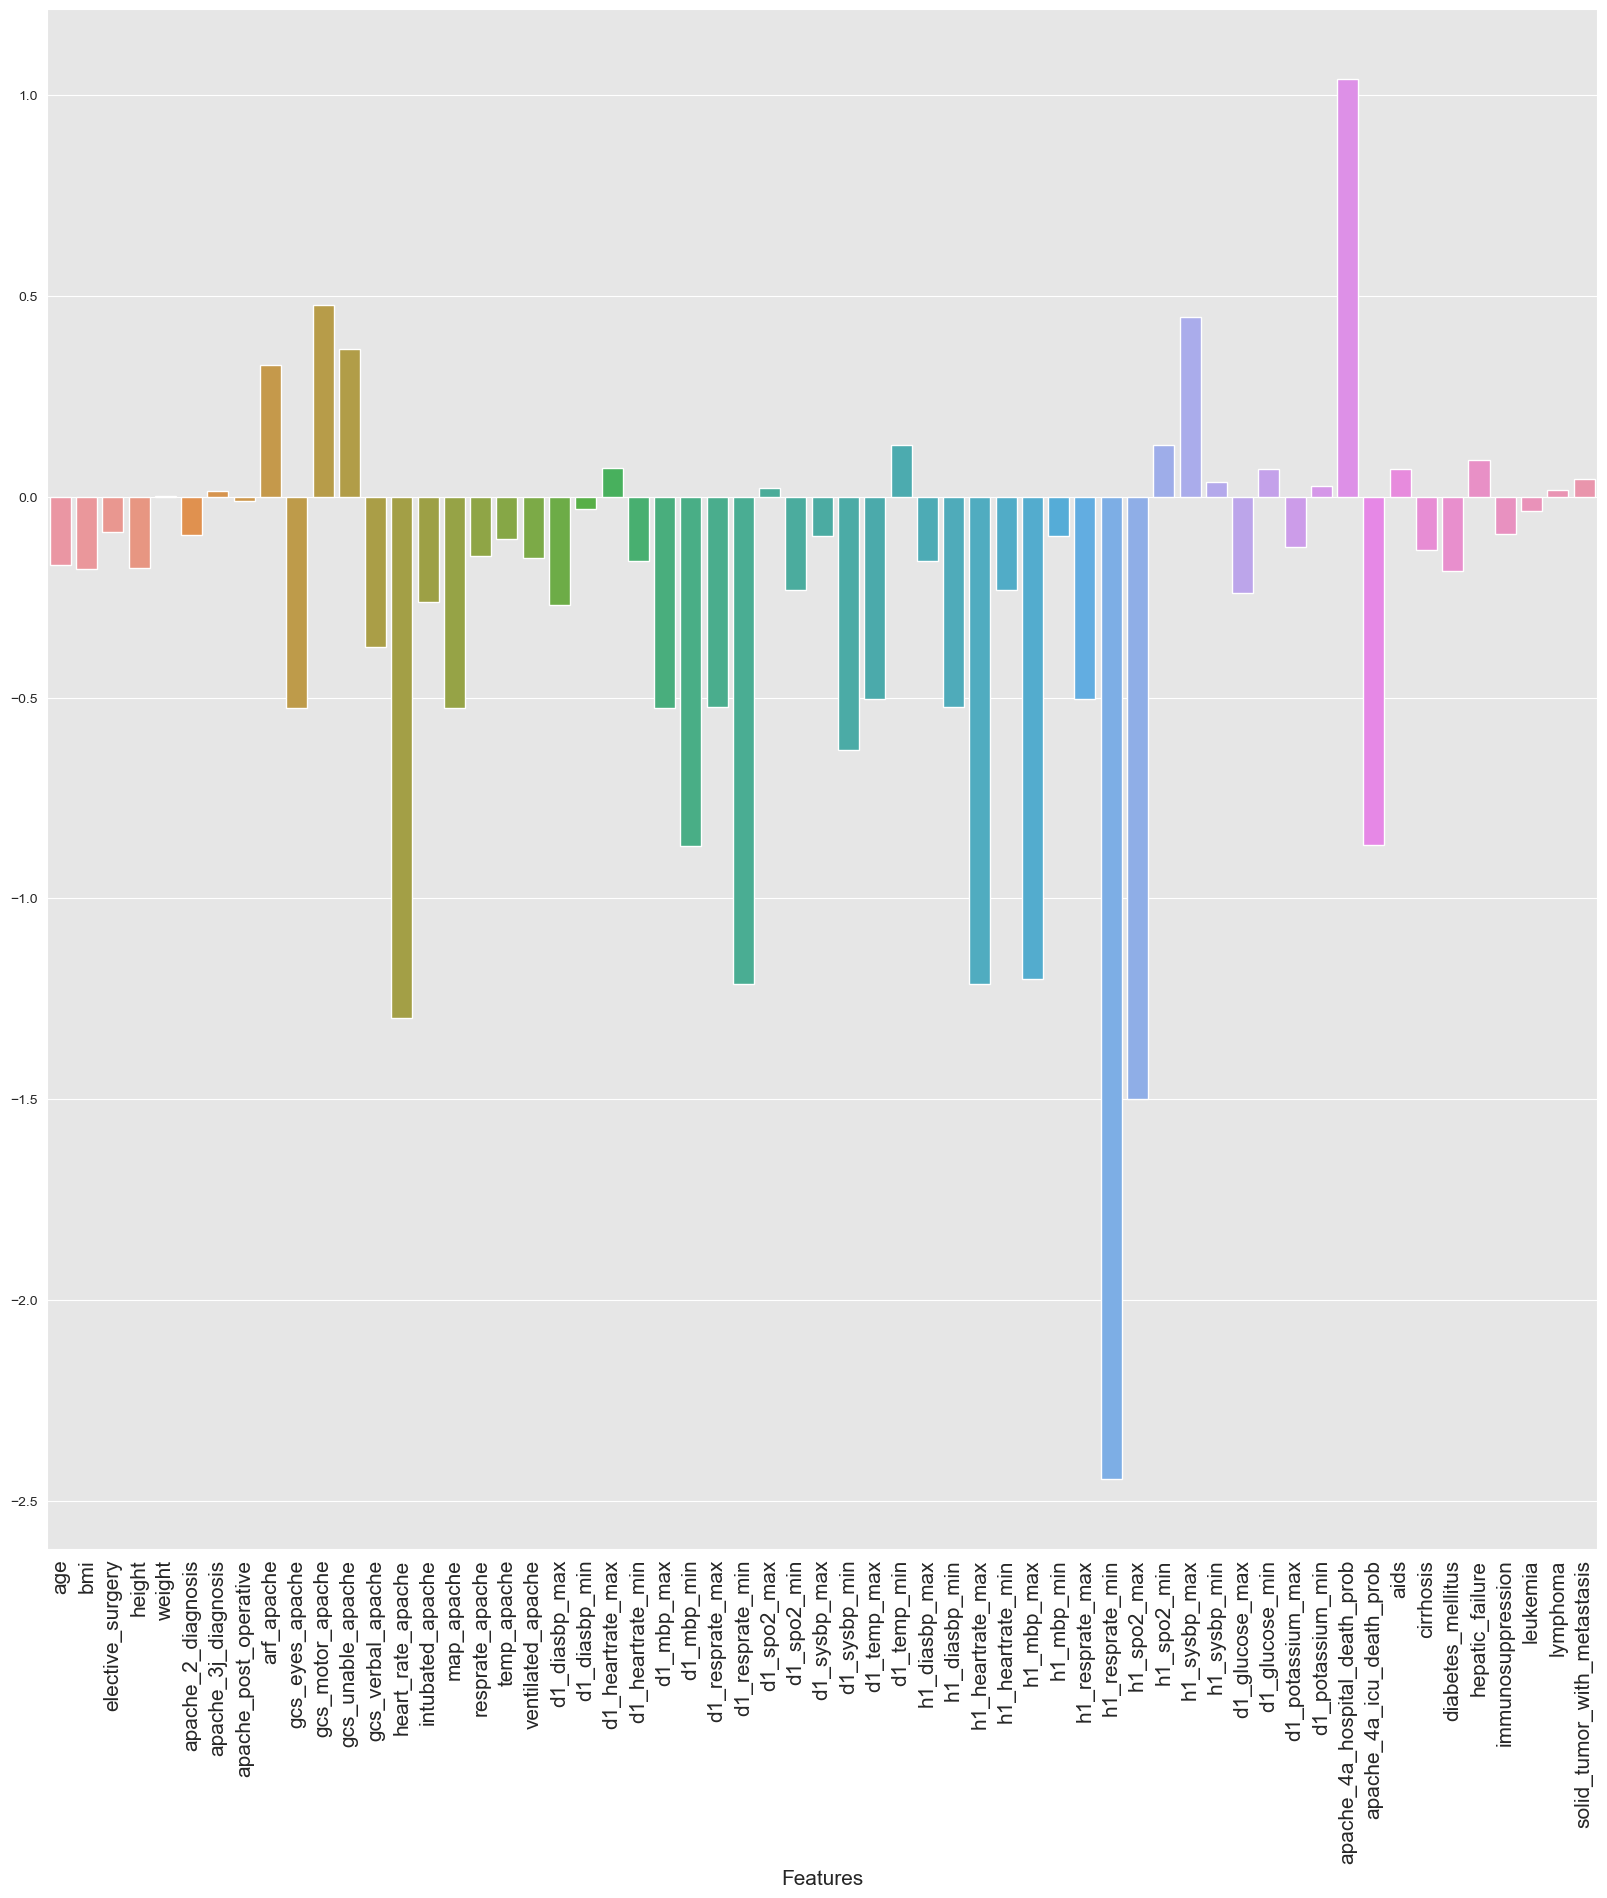

In [180]:
fig, ax = plt.subplots(figsize = (20, 20))
sns.barplot(x = features, y = lrweight1)
plt.xlabel("Features", fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.show();